In [ ]:
from vae import VAETrainer
from ae import AETrainer
from svdd import SVDDTrainer
from datasets import TrainLoader, TestLoader

import sys



from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import os
import argparse

from tensorflow import keras

In [ ]:
from main import train

In [ ]:
config = [
    [32, 3, 2],
    [64, 3, 2],
    [128, 3, 2],
]

AUC = []
test_seed = [42, 123, 245, 2023, 145, 214, 326, 147, 95, 32]


model, auc = train(modelName='svdd', source='../datasets/dataset_speed_change/', batch_size=16, 
                   config=config, latent_dim=16, lr=0.0001, epochs=20, objective='soft-boundry', ae_epochs=10,
                   nu=0.02, gamma=0.1, seed=42, Normal= ['Walking', 'Running', 'Jogging', 'TalkOnThePhone'])


In [3]:
import pandas as pd
import numpy as np


file = pd.read_csv('results/dataset_speed_change/ae.csv')
seed = file['42'].tolist()
auc = file['0.8821461609620722'].tolist()

seed.append(42)
auc.app

data = {
    'seed': seed,
    'auc': auc,
}

dataframe = pd.DataFrame(data=data)

In [26]:
print('Mean AUC: {:.2f}'.format(np.mean(auc)))
print('StdDeviation: {:.4f}'.format(np.std(auc)))

Mean AUC: 0.76
StdDeviation: 0.0005


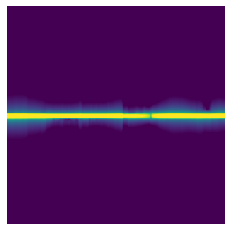

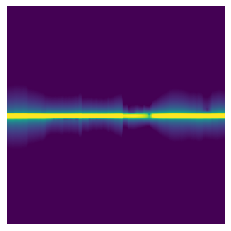

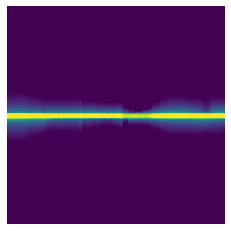

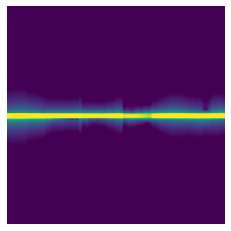

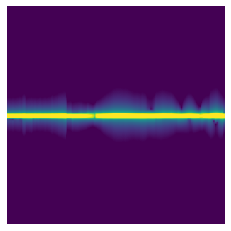

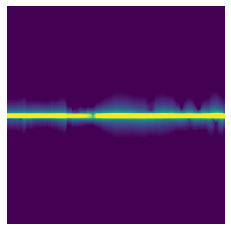

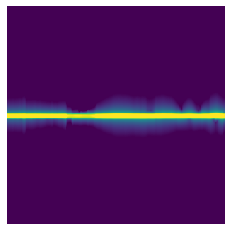

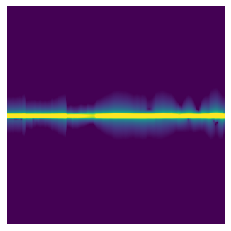

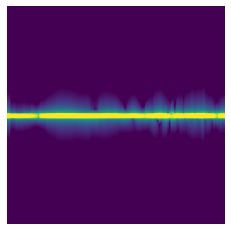

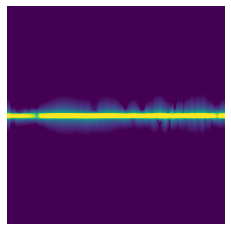

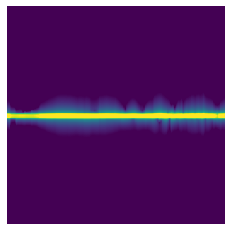

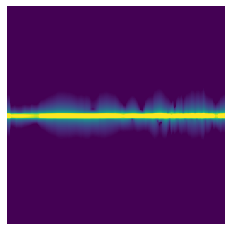

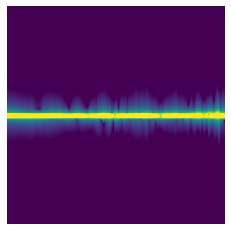

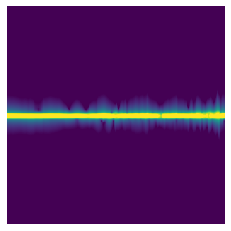

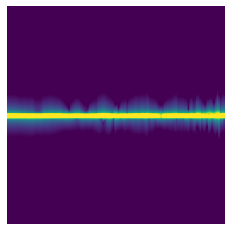

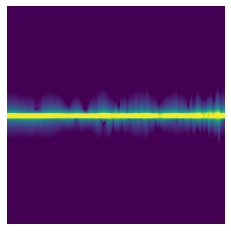

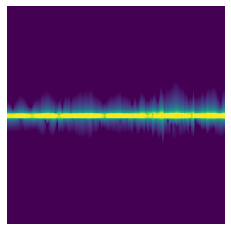

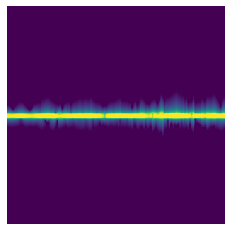

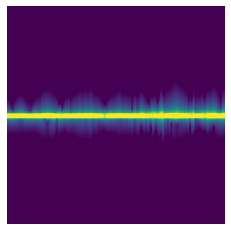

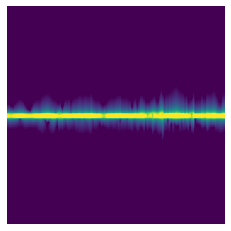

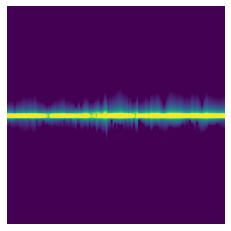

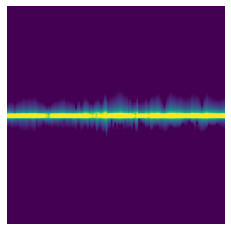

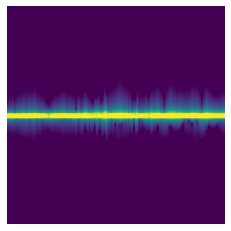

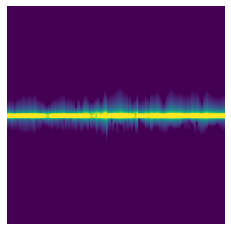

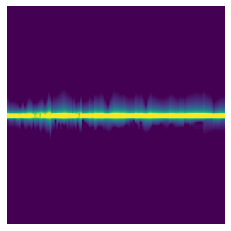

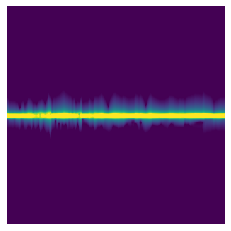

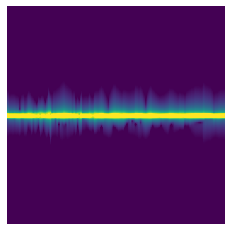

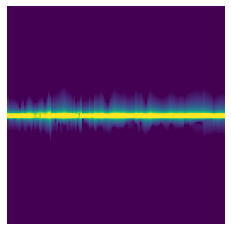

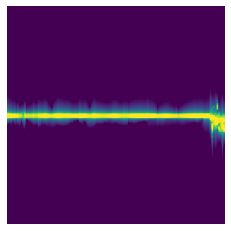

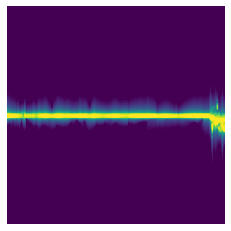

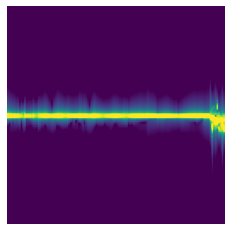

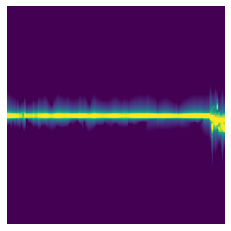

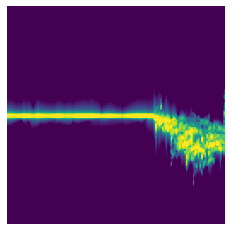

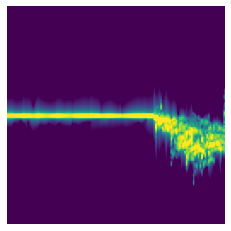

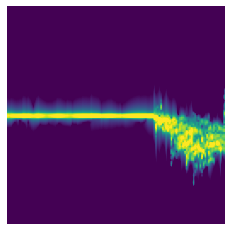

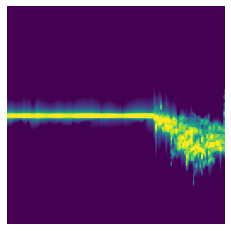

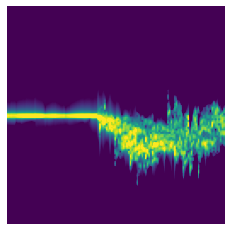

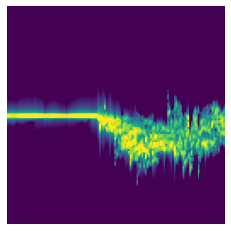

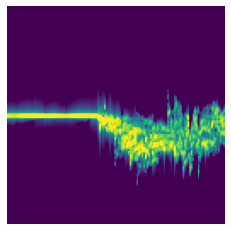

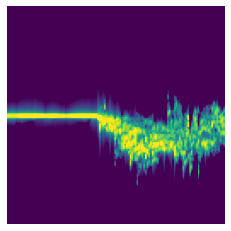

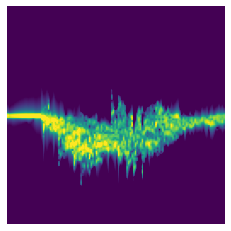

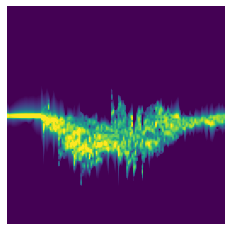

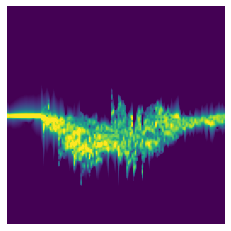

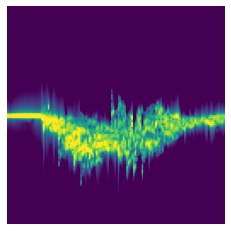

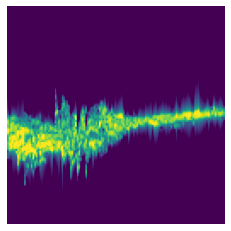

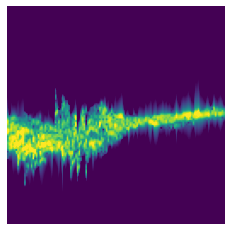

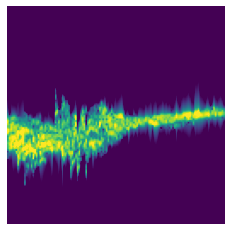

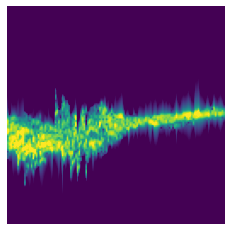

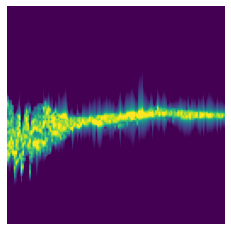

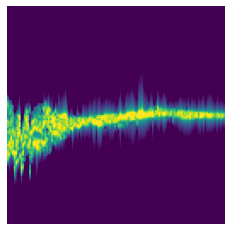

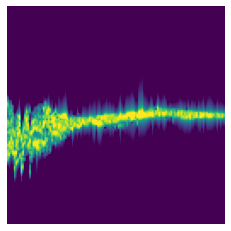

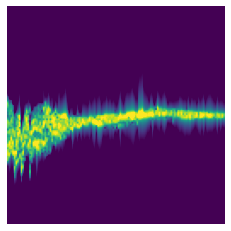

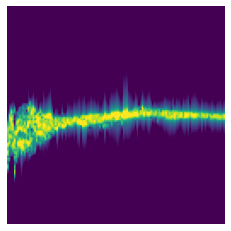

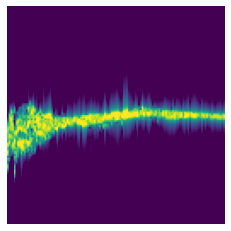

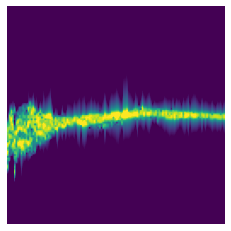

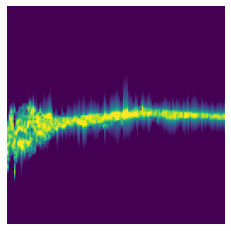

In [49]:
import pickle

with open('../datasets/dataset_AoA_change/test/Falling/HitByCar.pickle', "rb") as f:
    dataset = pickle.load(f)

for data in dataset:
    for i in range(data.shape[1]):
        s = data[:, i]
        
        spec = 10 * np.log10(abs(s) ** 2)
        MIN = np.min(spec)
        MAX = np.max(spec)
        
        spec = (spec - MIN) / (MAX -MIN)
        
        plt.imshow(spec, vmin=0.5, vmax=0.9)
        plt.axis('off')
        plt.show()